<a href="https://colab.research.google.com/github/Twujira/TW_Data201/blob/main/Project_3_restored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project #3

#### Team #2:
* Andrew George
* Tigist Wujira
* Beza Arega
* Nataliia Padilla

### About the Dataset
https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data

The "Salary Prediction Dataset" is a synthetic dataset generated for the purpose of exploring salary prediction tasks. It contains simulated data reflecting various factors influencing salary levels such as education, experience, location, job title, age, and gender. This dataset can be utilized for predictive modeling tasks to estimate salaries based on these factors.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrsimple07/salary-prediction-data")

print("Path to dataset files:", path)

100%|██████████| 16.2k/16.2k [00:00<00:00, 7.32MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrsimple07/salary-prediction-data/versions/1


In [ ]:
df = pd.read_csv(path + "/salary_prediction_data.csv")
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [ ]:
df['Salary'] = df['Salary'].round(0)
print(df.head())

     Education  Experience  Location Job_Title  Age  Gender    Salary
0  High School           8     Urban   Manager   63    Male   84620.0
1          PhD          11  Suburban  Director   59    Male  142591.0
2     Bachelor          28  Suburban   Manager   61  Female   97800.0
3  High School          29     Rural  Director   45    Male   96835.0
4          PhD          25     Urban   Analyst   26  Female  132158.0


In [ ]:
#create a new column 'wage_category' based on Salary and separate it into high, medium and low
df['wage_category'] = pd.cut(df['Salary'], bins=[0, 85032, 126804, np.inf], labels=['low', 'medium', 'high'])


df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary,wage_category
0,High School,8,Urban,Manager,63,Male,84620.0,low
1,PhD,11,Suburban,Director,59,Male,142591.0,high
2,Bachelor,28,Suburban,Manager,61,Female,97800.0,medium
3,High School,29,Rural,Director,45,Male,96835.0,medium
4,PhD,25,Urban,Analyst,26,Female,132158.0,high


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Education      1000 non-null   object  
 1   Experience     1000 non-null   int64   
 2   Location       1000 non-null   object  
 3   Job_Title      1000 non-null   object  
 4   Age            1000 non-null   int64   
 5   Gender         1000 non-null   object  
 6   Salary         1000 non-null   float64 
 7   wage_category  1000 non-null   category
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 55.9+ KB


In [ ]:
#Check unique values for all columns except Salary
for col in df.columns:
    if col != 'Salary':
        print(col, df[col].unique())

Education ['High School' 'PhD' 'Bachelor' 'Master']
Experience [ 8 11 28 29 25 19  4 13 20 14 23  1  7 26  3 21 12  5 10  2 16 24  6 22
  9 17 27 18 15]
Location ['Urban' 'Suburban' 'Rural']
Job_Title ['Manager' 'Director' 'Analyst' 'Engineer']
Age [63 59 61 45 26 27 60 49 25 58 23 43 44 37 53 34 62 36 21 20 35 28 40 22
 50 33 31 47 64 24 57 32 48 46 42 51 41 56 54 30 38 29 52 39 55]
Gender ['Male' 'Female']
wage_category ['low', 'high', 'medium']
Categories (3, object): ['low' < 'medium' < 'high']


In [ ]:
#replace categorical values with numerical
education_map = {'High School' : 1, 'Bachelor' : 2, 'Master' : 3, 'PhD' : 4}
df['Education'] = df['Education'].map(education_map)
location_map = {'Rural' : 1, 'Suburban' : 2, 'Urban' : 3}
df['Location'] = df['Location'].map(location_map)
job_title_map = {'Engineer' : 1, 'Analyst' : 2, 'Manager' : 3, 'Director' : 4}
df['Job_Title'] = df['Job_Title'].map(job_title_map)
gender_map = {'Female' : 1, 'Male' : 2}
df['Gender'] = df['Gender'].map(gender_map)
wage_map = {'low' :1,'medium' :2, 'high' :3}
df['wage_category'] = df['wage_category'].map(wage_map)
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary,wage_category
0,1,8,3,3,63,2,84620.0,1
1,4,11,2,4,59,2,142591.0,3
2,2,28,2,3,61,1,97800.0,2
3,1,29,1,4,45,2,96835.0,2
4,4,25,3,2,26,1,132158.0,3


In [ ]:
# Replace string values with numbers
df['wage_category'] = df['wage_category'].replace({'low': 1, 'medium': 2, 'high': 3})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Education      1000 non-null   int64   
 1   Experience     1000 non-null   int64   
 2   Location       1000 non-null   int64   
 3   Job_Title      1000 non-null   int64   
 4   Age            1000 non-null   int64   
 5   Gender         1000 non-null   int64   
 6   Salary         1000 non-null   float64 
 7   wage_category  1000 non-null   category
dtypes: category(1), float64(1), int64(6)
memory usage: 55.9 KB


In [ ]:
df.describe()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.488000,14.771000,1.965000,2.562000,42.377000,1.516000,105558.412000
std,1.123886,8.341111,0.808968,1.120451,13.609412,0.499994,28256.971381
min,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,33511.000000
25%,1.000000,7.000000,1.000000,2.000000,30.000000,1.000000,85032.000000
50%,2.000000,15.000000,2.000000,3.000000,43.000000,2.000000,104314.500000
75%,4.000000,22.000000,3.000000,4.000000,55.000000,2.000000,126803.750000
max,4.000000,29.000000,3.000000,4.000000,64.000000,2.000000,193017.000000


In [ ]:
df.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0
wage_category,0


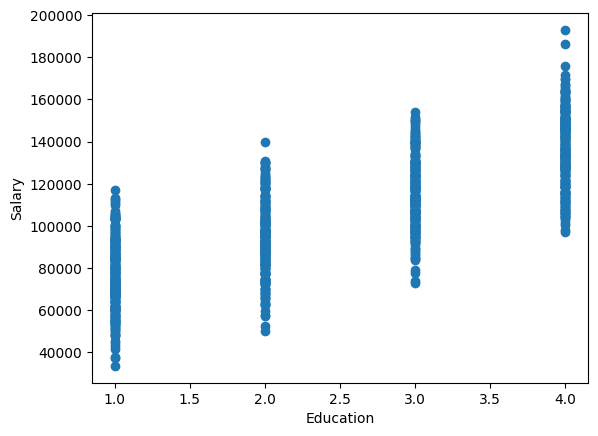

In [ ]:
#scatterplot of education and salary
plt.scatter(df['Education'], df['Salary'])
plt.xlabel('Education')
plt.ylabel('Salary')
plt.show()

<Axes: >

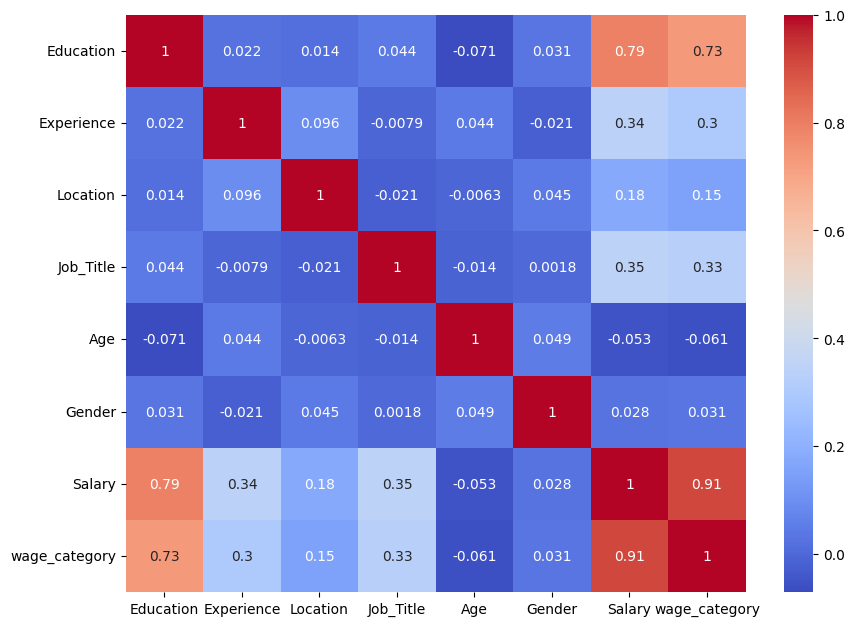

In [ ]:
#correlation heatmap
plt.figure(figsize=(10, 7.5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

The correlation coefficient between Salary and Education is 0.79 indicating a strong positive correlation where higher education levels are generally associated with higher salaries. There is a moderate positive correlation between Salary and Experience of 0.34, suggesting that experience has some impact on salary, though it is not as strong as education. There is a weak positive correlation between Salary and Age of 0.18, indicating that age has a minor relationship with salary. The correlation coefficient between Salary and Gender is 0.02, which is almost negligible. Education and Experience have a weak correlation of 0.22, showing that they are somewhat independent of each other. Most other variables such as job location have very low or negligible correlations with Salary.

In [ ]:
# Features and target
X = df[['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender']]
y = df['wage_category']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


# Make predictions
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Classes:', logreg.classes_)
print('Intercept:', logreg.intercept_)
print('Coefficients:', logreg.coef_)

Classes: [1 2 3]
Intercept: [ 2.47899106  0.9109831  -3.38997415]
Coefficients: [[-1.884404   -0.08479612 -0.15781109 -0.60409761  0.03904095  1.75538789]
 [ 0.29272638 -0.00398568  0.13875856  0.03763046 -0.01111789 -0.1041116 ]
 [ 1.59167762  0.0887818   0.01905253  0.56646715 -0.02792306 -1.65127629]]


In [ ]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.71      0.69        42
           2       0.73      0.76      0.74       108
           3       0.71      0.60      0.65        50

    accuracy                           0.71       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.71      0.71      0.71       200



In [ ]:
# Predict the classes
y_pred = logreg.predict(X_test)

# Predict the class probabilities
y_pred_proba = logreg.predict_proba(X_test)

print("Predicted Classes:", y_pred)
print("Predicted Probabilities:", y_pred_proba)

Predicted Classes: [1 1 2 2 2 1 2 2 2 2 3 3 3 1 2 1 2 2 2 1 2 2 1 3 2 2 3 1 3 2 2 1 2 3 3 3 2
 2 2 3 3 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 3 3 1 2 2 1 3 1 2 3 2 3 3
 1 2 2 2 2 2 1 2 1 1 2 1 3 2 2 3 2 3 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1
 2 2 1 1 3 2 2 2 2 1 1 2 2 2 3 1 3 3 2 2 2 3 2 2 2 2 1 2 2 2 2 3 3 3 1 2 1
 2 3 2 2 2 2 2 1 2 1 3 3 1 1 3 2 3 3 3 3 2 2 3 3 3 2 1 3 1 2 2 2 2 2 2 2 3
 1 2 1 2 1 2 2 2 1 2 2 2 1 3 2]
Predicted Probabilities: [[8.56580226e-01 1.41172294e-01 2.24748081e-03]
 [9.75978538e-01 2.39423847e-02 7.90777228e-05]
 [2.01650854e-02 6.74707290e-01 3.05127625e-01]
 [3.17445389e-02 7.68505579e-01 1.99749882e-01]
 [3.02229004e-01 6.41313938e-01 5.64570581e-02]
 [5.35999835e-01 4.55096295e-01 8.90387040e-03]
 [2.13110397e-01 7.13408267e-01 7.34813358e-02]
 [4.09154266e-02 7.94109718e-01 1.64974856e-01]
 [8.12144392e-03 5.90801199e-01 4.01077357e-01]
 [8.08021163e-03 5.87364539e-01 4.04555249e-01]
 [5.98305942e-04 3.56378732e-01 6.43022962e-01]
 [9.85447917e-04 3.41